## 单层神经网络

### 回归神经网络：线性回归

In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
z_reg = np.array([-0.2, -0.05, -0.05, 0.1])

In [3]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [4]:
X.shape

(4, 2)

In [5]:
z_reg

array([-0.2 , -0.05, -0.05,  0.1 ])

In [6]:
# 定义实现简单线性回归的函数
def LinearR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.2  # 给定一组系数w和b
    z = x1*w1 + x2*w2 + b  # z是系数*特征后加和的结果
    return z

In [7]:
LinearR(X[:, 0], X[:, 1])

array([-0.2 , -0.05, -0.05,  0.1 ])

### 二分类单层神经网络：sigmoid与阶跃函数

In [8]:
# 重新定义数据中的标签
y_and = [0, 0, 0, 1]

In [9]:
# 根据sigmoid公式定义sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def AND_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.2  # 给定的系数w和b不变
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 使用sigmoid函数将回归结果转换到(0,1)之间
    y = (o >= 0.5).astype(int)
#     y = [int(x) for x in o >= 0.5] #根据阈值0.5，将(0,1)之间的概率转变为分类0和1
    return o, y

In [11]:
# o:sigmoid函数返回的概率结果
# y:对概率结果按阈值进行划分后，形成的0和1，也就是分类标签
o, y_sigm = AND_sigmoid(X[:, 0], X[:, 1])

In [12]:
o

array([0.450166  , 0.4875026 , 0.4875026 , 0.52497919])

In [13]:
y_sigm

array([0, 0, 0, 1])

In [14]:
y_sigm == y_and

In [ ]:
y_sigm == y_and

In [15]:
y_sigm == y_and

array([ True,  True,  True,  True])

In [16]:
y_sigm == y_and

array([ True,  True,  True,  True])

In [17]:
# 阶跃函数
def AND(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23  # 和sigmoid相似的w和b
    z = x1*w1 + x2*w2 + b
    y = (z >= 0).astype(int)
#     y = [int(x) for x in z >= 0]
    return y

In [18]:
AND(X[:, 0], X[:, 1])

array([0, 0, 0, 1])

### 多分类单层神经网络：softmax回归

In [19]:
z = np.array([1010, 1000, 990])
np.exp(z) / np.sum(np.exp(z))   # softmax函数的运算

<ipython-input-19-d09822f2937e>:2: RuntimeWarning: overflow encountered in exp
  np.exp(z) / np.sum(np.exp(z))   # softmax函数的运算
<ipython-input-19-d09822f2937e>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(z) / np.sum(np.exp(z))   # softmax函数的运算


array([nan, nan, nan])

In [20]:
# 定义softmax函数
def softmax(z):
    c = np.max(z)
    exp_z = np.exp(z - c)  # 溢出对策
    sum_exp_z = np.sum(exp_z)
    o = exp_z / sum_exp_z
    return o

In [21]:
softmax(z)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [22]:
sum(softmax(z))

1.0

## 多层神经网络

### 异或门问题

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 与门图像

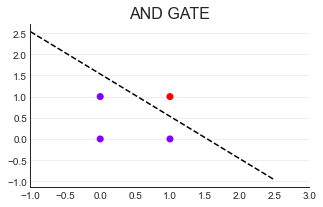

In [27]:
plt.style.use('seaborn-whitegrid')  # 设置图像的风格
sns.set_style("white")
plt.figure(figsize=(5, 3))  # 设置画布大小
plt.title("AND GATE", fontsize=16)  # 设置图像标题
plt.scatter(X[:, 0], X[:, 1], c=y_and, cmap="rainbow")  # 绘制散点图
x = np.arange(-1, 3, 0.5)
plt.plot(x, (0.23-0.15*x)/0.15,  # 这里是从直线的表达式变型出的x2 = 的式子
         color="k", linestyle="--")
plt.xlim(-1, 3)  # 设置横纵坐标尺寸 plt.ylim(-1,3)
plt.grid(alpha=.4, axis="y")  # 显示背景中的网格
plt.gca().spines["top"].set_alpha(.0)  # 让上方和右侧的坐标轴被隐藏
plt.gca().spines["right"].set_alpha(.0)

#### 或门、或门的图像

In [28]:
# 或门、或门的图像
y_or = [0, 1, 1, 1]


def OR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.08  # 为了拟合不同的标签，重新定义一组w和b
    z = x1*w1 + x2*w2 + b
    y = (z >= 0).astype(int)
    return y

In [29]:
OR(X[:, 0], X[:, 1])

array([0, 1, 1, 1])

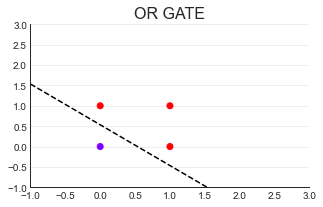

In [30]:
# 绘制直线划分散点的图像
x = np.arange(-1, 3, 0.5)
plt.figure(figsize=(5, 3))
plt.title("OR GATE", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], c=y_or, cmap="rainbow")
plt.plot(x, (0.08-0.15*x)/0.15, color="k", linestyle="--")
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(alpha=.4, axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

#### 非与门、非与门的图像

In [31]:
y_nand = [1, 1, 1, 0]


def NAND(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23  # 同样为了拟合不同的标签，重新定义一组 w和b
    z = x1*w1 + x2*w2 + b
    y = [int(x) for x in z >= 0]
    return y

In [32]:
NAND(X[:, 0], X[:, 1])

[1, 1, 1, 0]

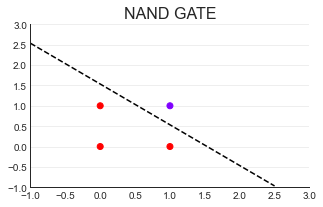

In [33]:
# 图像
x = np.arange(-1, 3, 0.5)
plt.figure(figsize=(5, 3))
plt.title("NAND GATE", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], c=y_nand, cmap="rainbow")
plt.plot(x, (0.23-0.15*x)/0.15, color="k", linestyle="--")
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(alpha=.4, axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

#### “异或门”（XOR GATE）

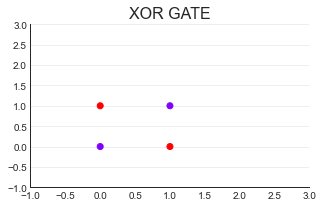

In [35]:
y_xor = [0, 1, 1, 0]

plt.figure(figsize=(5, 3))
plt.title("XOR GATE", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], c=y_xor, cmap="rainbow")
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(alpha=.4, axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

In [36]:
def XOR(x1, x2):
    y_and = NAND(X[:, 0], X[:, 1])
    y_or = OR(X[:, 0], X[:, 1])
    y_and = AND(np.array(y_nand), np.array(y_or))
    print("NAND:",y_nand)
    print("OR:",y_or)
    return y_and

In [37]:
XOR(X[:, 0], X[:, 1])

NAND: [1, 1, 1, 0]
OR: [0 1 1 1]


array([0, 1, 1, 0])

### 探索多层神经网络：层 vs h(z)

#### 如果h(z)是线 性函数，或不存在，那增加再多的层也没有用。

In [38]:
# 回忆一下XOR数据的真实标签
y_xor = [0, 1, 1, 0]


def AND(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23
    z = x1*w1 + x2*w2 + b
    # 下面这一行就是阶跃函数的表达式，注意AND函数是在输出层，所以保留输出层的阶跃函数g(z)
    y = [int(x) for x in z >= 0]
    return y


def OR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.08
    z = x1*w1 + x2*w2 + b
    # y = [int(x) for x in z >= 0] #注释掉阶跃函数，相当于h(z)是恒等函数
    return z


def NAND(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23
    z = x1*w1 + x2*w2 + b
    # y = [int(x) for x in z >= 0] #注释掉阶跃函数，相当于h(z)是恒等函数
    return z


def XOR(x1, x2):
    z_nand = NAND(X[:, 0], X[:, 1])
    z_or = OR(X[:, 0], X[:, 1])
    y_and = AND(np.array(z_nand), np.array(z_or))
    return y_and

In [39]:
XOR(X[:, 0], X[:, 1])

[0, 0, 0, 0]

#### 使用sigmoid函数作为h(z)

In [40]:
# 根据sigmoid公式定义sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))


def AND_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23
    z = x1*w1 + x2*w2 + b
    # AND函数是位于输出层的，这里是g(z)而非h(z)，因此不会受到将阶跃函数更换为sigmoid的影响
    # g(z)依然是阶跃函数
    y = [int(x) for x in z >= 0]
    return y


def OR_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.075
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 这里是h(z)，我们使用sigmoid函数
    return o


def NAND_sigmoid(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 这里是h(z)，我们使用sigmoid函数
    return o


def XOR_sigmoid(x1, x2):
    o_nand = NAND_sigmoid(X[:, 0], X[:, 1])
    o_or = OR_sigmoid(X[:, 0], X[:, 1])
    y_and = AND_sigmoid(np.array(o_nand), np.array(o_or))
    return y_and


XOR_sigmoid(X[:, 0], X[:, 1])

[0, 0, 0, 0]

即便是使用了非线性的 h(z)，也不一定能够解决非线性的问题。在不适合的非线性函 数加持下，神经网络的层数再多也无法起效。

### 激活函数

#### h(z) vs g(z)

In [41]:
# 如果g(z)是sigmoid函数，而h(z)是阶跃函数

# 根据sigmoid公式定义sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))


def AND_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 输出层是sigmoid函数
    y = [int(x) for x in o >= 0.5]  # 按0.5为阈值将结果化为0和1
    return o, y


def OR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.075
    z = x1*w1 + x2*w2 + b
    o = [int(x) for x in z >= 0]  # 这里是h(z)，我们使用阶跃函数
    return o


def NAND(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23
    z = x1*w1 + x2*w2 + b
    o = [int(x) for x in z >= 0]  # 这里是h(z)，我们使用阶跃函数
    return o


def XOR(x1, x2):
    o_nand = NAND(X[:, 0], X[:, 1])
    o_or = OR(X[:, 0], X[:, 1])
    y_and = AND_sigmoid(np.array(o_nand), np.array(o_or))
    return y_and

In [42]:
XOR(X[:, 0], X[:, 1])

(array([0.48001066, 0.51749286, 0.51749286, 0.48001066]), [0, 1, 1, 0])

In [43]:
y_xor

[0, 1, 1, 0]

#### ReLU & tanh

In [44]:
def relu(z):
    import numpy as np
    return np.maximum(0, z)

In [46]:
relu(np.array([-1, -0.4, 1, 1.5]))

array([0. , 0. , 1. , 1.5])

### MLP多层感知机

#### 隐藏层与神经元：重要参数hidden_layer_sizes

1. 导入需要的数据和库，导入数据集

In [47]:
import numpy as np
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.model_selection import cross_val_score as cv
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier as RFC
from time import time
import datetime

In [48]:
# 先使用机器学习中的数据来试试看神经网络的效果
data = load_breast_cancer()
X = data.data
y = data.target

y  # 二分类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

2. 建模，使用交叉验证导出分数

In [49]:
dnn = DNN(hidden_layer_sizes=(200,),
          random_state=420  # random_state控制着神经网络上的某些随机性， 你能够猜到一些吗？
          )
# 这样，一个简单的神经网络就实例化完毕了
cv(dnn, X, y, cv=5).mean()

0.9349945660611707

In [50]:
# 接口predict：预测出结果，由于之前在交叉验证中的训练不会被记录，因此需要重新训练
dnn.fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [64]:
# 接口predict_proba：返回预测的概率
dnn.fit(X, y).predict_proba(X)

array([[1.00000000e+00, 5.80211596e-25],
       [1.00000000e+00, 1.00641444e-14],
       [9.99999999e-01, 6.28745603e-10],
       ...,
       [9.99497591e-01, 5.02409394e-04],
       [1.00000000e+00, 2.79983276e-11],
       [1.45552433e-01, 8.54447567e-01]])

In [65]:
# 看看运行时间如何
times = time()
dnn = DNN(hidden_layer_sizes=(200,), random_state=420)
print(cv(dnn, X, y, cv=5).mean())
print(time() - times)

0.9349945660611707
1.201362133026123


In [66]:
# 使用随机森林进行一个对比
times = time()
clf_rfc = RFC(n_estimators=200, random_state=420)
print(cv(clf_rfc, X, y, cv=5).mean())
print(time() - times)

0.9613414066138798
1.5502710342407227


3. 使用参数hidden_layer_sizes

In [77]:
times = time()
dnn = DNN(hidden_layer_sizes=(50), random_state=420)
print(cv(dnn, X, y, cv=5).mean())
print(time() - times)
# 试试看不用的神经元个数组合：(50,50),(50,100),(100,50),(100,100,100)
# 不断调整hidden_layer_sizes中输入的内容，你发现了什么？
# 来试试看，(70,)

0.934979040521658
1.0657610893249512


In [78]:
# 使用重要属性n_layers_，显示神经网络的层数
dnn.fit(X, y).n_layers_
# 这里返回的层数将输入层和输出层也考虑在其中

3

In [79]:
# 重要属性classes_，查看返回结果中一共有多少个类别
dnn.fit(X, y).classes_

array([0, 1])

In [80]:
# 重要属性n_outputs_，显示输出层上神经元的个数（即输出结果的个数）
# 试想下二分类神经网络对应的g(z)和我们之前总结的规律，应该很容易就能够判断这里会 输出几
dnn.fit(X, y).n_outputs_

1

In [81]:
# 如果更换数据，n_outputs会返回多少？
from sklearn.datasets import load_digits
dnn.fit(load_digits().data, load_digits().target).n_outputs_

/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


10

In [82]:
np.unique(load_digits().target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

4. 提升神经网络效果的有效方法：归一化

In [83]:
from sklearn.preprocessing import StandardScaler as SS

In [84]:
X_ = SS().fit_transform(X)

In [86]:
times = time()
dnn = DNN(hidden_layer_sizes=(200, 50), random_state=420)
print(cv(dnn, X_, y, cv=5).mean())
print(time() - times)
# 最终的结果显示，(200,50)是一个比较有效的组合

0.9806862288464524
2.1518898010253906


#### 激活函数：重要参数activation

In [88]:
for activef in ['identity', 'logistic', 'tanh', 'relu']:
    times = time()
    dnn = DNN(hidden_layer_sizes=(200, 50),
              activation=activef,
              max_iter=2000,
              random_state=420
              )
    print(activef, cv(dnn, X_, y, cv=5).mean())
    print(time() - times)

identity 0.9613724576929048
2.007845163345337
logistic 0.9666356155876418
7.091061115264893
tanh 0.9754385964912281
3.5398380756378174
relu 0.9806862288464524
1.9739201068878174


In [89]:
# 重要属性out_activation_，猜猜它会返回什么内容？

dnn.fit(X, y).out_activation_

'logistic'

In [90]:
# 如果更换数据，out_activation_会返回什么结果？

dnn.fit(load_digits().data, load_digits().target).out_activation_

'softmax'

In [91]:
# 很明显，属性out_activation_返回的是g(z)，而参数activation控制的是h(z)。

## 神经网络学习

### 神经网络学习的基本思想

In [93]:
for solver_ in ['adam', 'lbfgs', 'sgd']:
    times = time()
    dnn = DNN(hidden_layer_sizes=(200, 50),
              solver=solver_,
              activation='relu',
              max_iter=2000,  # 如果设置较小的max_iter会发生什么？
              random_state=420
              )
    print(solver_, cv(dnn, X_, y, cv=5).mean())
    print(time() - times)

adam 0.9806862288464524
1.9451310634613037
lbfgs 0.9648967551622419
0.5077519416809082
sgd 0.9736531594472908
5.633463144302368


#### mini-batch SGD

In [94]:
# 看看乳腺癌数据集的结构，注意到这是一个非常小的数据集

X_.shape

(569, 30)

In [95]:
# 建立神经网络
dnn = DNN(hidden_layer_sizes=(20,),
          activation='relu',
          batch_size=20,  # 批量大小N_B
          shuffle=True,  # 是否随机选取
          max_iter=500,  # 从参数的样子来看是最大迭代次数的意思，和逻辑回归中 相似，暂时不用去管
          random_state=420
          )
dnn = dnn.fit(X_, y)

# 接口score
dnn.score(X_, y)

1.0

In [96]:
# 重要属性n_iter_
# 注意，只有训练完毕的模型才存在该属性，使用交叉验证时无法获取模型的实际迭代次数

dnn.n_iter_

237

In [98]:
import datetime

In [100]:
# 试试看不同batch_size下的测试分数结果
for size in [450, 200, 50]:
    dnn = DNN(hidden_layer_sizes=(20,),
              activation='relu',
              batch_size=size,  # 批量大小N_B
              shuffle=True,  # 是否随机选取
              max_iter=500,  # 从参数的样子来看是最大迭代次数的意思，和逻辑回归中 相似，暂时不用去管
              random_state=420
              )
    times = time()
    cvresult = cv(dnn, X_, y, cv=5)  # 交叉验证
    usedtime = time() - times
    acc, var = cvresult.mean(), cvresult.var()
    print("batch_size:", size)
    print("\t time:", datetime.datetime.fromtimestamp(
        usedtime).strftime("%M:%S:%f"))
    print("\t cv value:", acc, var)  # 返回交叉验证的均值和方差
    print("")

batch_size: 450
	 time: 00:01:287731
	 cv value: 0.9771619313771154 4.892292503671222e-05

batch_size: 200
	 time: 00:02:156664
	 cv value: 0.9789318428815401 7.964425808976153e-05

batch_size: 50
	 time: 00:04:286932
	 cv value: 0.9753764943331781 4.4413022160158524e-05



#### 更换成更大的数据集

In [101]:
import pandas as pd

In [102]:
# 导入神经网络入门数据MNIST 
#这是手写数字数据集，我们以前经常使用的sklearn中的load_digits就是从MNIST中 提取出来的1700多条数据
data = pd.read_csv('./mnist-in-csv/mnist_train.csv')

In [103]:
data.shape

(60000, 785)

In [104]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
datay = data.iloc[:, 0]
datax = data.iloc[:, 1:]

In [106]:
from sklearn.preprocessing import StandardScaler as SS
datax_ = SS().fit_transform(datax)

In [108]:
# 在该数据集的基础上，建立不同batch_size的神经网络
for size in [60000, 10000, 5000, 1000, 200]:
    dnn = DNN(hidden_layer_sizes=(20,),
              activation='relu',
              batch_size=size,  # 批量大小N_B
              max_iter=3000,
              random_state=420
              )
    times = time()
    model = dnn.fit(datax_, datay)  # 为了更快的计算速度而不使用交叉验证
    result = model.score(datax_, datay)
    print("batch_size:", size)
    print("\t time:", datetime.datetime.fromtimestamp(
        time() - times).strftime("%M:%S:%f"))  # 运行时间
    print("\t acc:", result)  # 运行结果
    print("\t actual iter:", model.n_iter_)  # 在这里由于没有使用交叉验证，可以查看模型实际的迭代次数
    # 迭代次数*每次迭代时使用的数据，就可以看到真实的“算法遍历了多少数据”
    print("\t actual seen data amount:", model.n_iter_ * size)
    print("")

batch_size: 60000
	 time: 10:39:177924
	 acc: 0.9646333333333333
	 actual iter: 774
	 actual seen data amount: 46440000

batch_size: 10000
	 time: 09:24:239203
	 acc: 0.99535
	 actual iter: 689
	 actual seen data amount: 6890000

batch_size: 5000
	 time: 08:18:141077
	 acc: 0.9996333333333334
	 actual iter: 613
	 actual seen data amount: 3065000

batch_size: 1000
	 time: 04:55:844825
	 acc: 0.9999166666666667
	 actual iter: 335
	 actual seen data amount: 335000

batch_size: 200
	 time: 04:04:480439
	 acc: 0.99995
	 actual iter: 243
	 actual seen data amount: 48600



### 神经网络的学习流程

#### 第一轮迭代：全数据，小批量，epochs

In [109]:
for size in [450, 200, 50]:
    dnn = DNN(hidden_layer_sizes=(20,),
              activation='relu',
              batch_size=size,  # 批量大小N_B
              max_iter=500,
              random_state=420
              )
    times = time()
    cvresult = cv(dnn, X_, y, cv=5)
    usedtime = time() - times
    acc, var = cvresult.mean(), cvresult.var()
    print("batch_size:", size)
    print("\t time:", datetime.datetime.fromtimestamp(
        usedtime).strftime("%M:%S:%f"))  # 运行时间
    print("\t cv value:", acc, var)  # 返回交叉验证的均值和方差
    print("\t 完成一个epoch所需要的迭代次数:", X_.shape[0]*0.8/size)
    print("")

batch_size: 450
	 time: 00:01:275362
	 cv value: 0.9771619313771154 4.892292503671222e-05
	 完成一个epoch所需要的迭代次数: 1.0115555555555558

batch_size: 200
	 time: 00:02:191194
	 cv value: 0.9789318428815401 7.964425808976153e-05
	 完成一个epoch所需要的迭代次数: 2.2760000000000002

batch_size: 50
	 time: 00:04:356731
	 cv value: 0.9753764943331781 4.4413022160158524e-05
	 完成一个epoch所需要的迭代次数: 9.104000000000001



In [111]:
for size in [450, 200, 50]:
    dnn = DNN(hidden_layer_sizes=(20,),
              activation='relu',
              batch_size=size,  # 批量大小N_B
              max_iter=200,
              random_state=420
              )
    times = time()
    dnn = dnn.fit(X_, y)  # 为了调用真实的n_iter所以不使用交叉验证
    usedtime = time() - times
    print("batch_size:", size)
    print("\t time:", datetime.datetime.fromtimestamp(
        usedtime).strftime("%M:%S:%f"))  # 运行时间
    print("\t result:", dnn.score(X_, y))  # 返回结果
    print("\t actual iter:", dnn.n_iter_)  # 调用实际的迭代次数
    print("\t 完成一个epoch所需要的迭代次数:", X_.shape[0]*0.8/size)
    print("")

/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


batch_size: 450
	 time: 00:00:184113
	 result: 0.9894551845342706
	 actual iter: 200
	 完成一个epoch所需要的迭代次数: 1.0115555555555558



/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


batch_size: 200
	 time: 00:00:238927
	 result: 0.9929701230228472
	 actual iter: 200
	 完成一个epoch所需要的迭代次数: 2.2760000000000002

batch_size: 50
	 time: 00:00:723968
	 result: 0.9929701230228472
	 actual iter: 200
	 完成一个epoch所需要的迭代次数: 9.104000000000001



/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 第一轮迭代：学习率与学习率的调整

##### 学习率衰减

In [120]:
for t in [1, 2, 5, 10, 20]:  # t是迭代次数
    eta0, power_t = 0.1, 0.2  # 可以试着更换一下原始的eta0和设置的衰减用指数
    eta = eta0/np.power(t, power_t)
    print('iter:', t, '\teta:', eta)

iter: 1 	eta: 0.1
iter: 2 	eta: 0.08705505632961241
iter: 5 	eta: 0.07247796636776956
iter: 10 	eta: 0.06309573444801933
iter: 20 	eta: 0.05492802716530589


##### 自适应学习率调整

In [121]:
for eta_strategy in ['constant', 'invscaling', 'adaptive']:
    dnn = DNN(hidden_layer_sizes=(20,),
              activation='relu',
              solver='sgd',
              learning_rate_init=0.5,  # 初始学习率
              learning_rate=eta_strategy,  # 学习率的变化策略
              power_t=0.1,  # 衰减指数
              batch_size=200,
              max_iter=3000,
              random_state=420
              )
    times = time()
    cvresult = cv(dnn, X_, y, cv=5)
    usedtime = time() - times
    acc, var = cvresult.mean(), cvresult.var()
    print("eta_strategy:", eta_strategy)
    print("\t time:", datetime.datetime.fromtimestamp(
        usedtime).strftime("%M:%S:%f"))  # 运行时间
    print("\t cv value:", acc, var)
    print("")

eta_strategy: constant
	 time: 00:00:343704
	 cv value: 0.9736376339077782 3.0787378664389295e-05

eta_strategy: invscaling
	 time: 00:00:531842
	 cv value: 0.9754075454122031 4.265823365447623e-05

eta_strategy: adaptive
	 time: 00:00:834964
	 cv value: 0.9736376339077782 3.0787378664389295e-05



In [124]:
# 完成一次epoch所需要的迭代次数
iter_ = X_.shape[0]*0.8/200
print(iter_)

dnn = DNN(hidden_layer_sizes=(20,),
          activation='relu',
          solver='sgd',
          learning_rate_init=0.5,  # 初始学习率
          learning_rate='adaptive',  # 学习率的变化策略
          n_iter_no_change=5,  # 设定允许的最大无效epochs为5
          verbose=True,
          batch_size=200,
          max_iter=3000,
          random_state=420
          )

times = time()
dnn = dnn.fit(X_, y)
usedtime = time() - times
print("eta_strategy:adaptive")
print("\t time:", datetime.datetime.fromtimestamp(
    usedtime).strftime("%M:%S:%f"))
print("\t score:", dnn.score(X_, y))

2.2760000000000002
Iteration 1, loss = 0.40927842
Iteration 2, loss = 0.11355190
Iteration 3, loss = 0.06903990
Iteration 4, loss = 0.05962010
Iteration 5, loss = 0.05282566
Iteration 6, loss = 0.04439347
Iteration 7, loss = 0.03777019
Iteration 8, loss = 0.03430887
Iteration 9, loss = 0.03915498
Iteration 10, loss = 0.02625859
Iteration 11, loss = 0.02301228
Iteration 12, loss = 0.02062814
Iteration 13, loss = 0.01939899
Iteration 14, loss = 0.01822174
Iteration 15, loss = 0.01640199
Iteration 16, loss = 0.01585494
Iteration 17, loss = 0.01446319
Iteration 18, loss = 0.01413215
Iteration 19, loss = 0.01361747
Iteration 20, loss = 0.01231684
Iteration 21, loss = 0.01230287
Iteration 22, loss = 0.01287507
Iteration 23, loss = 0.01091168
Iteration 24, loss = 0.01079219
Iteration 25, loss = 0.01149510
Iteration 26, loss = 0.00959888
Iteration 27, loss = 0.00922374
Iteration 28, loss = 0.00929903
Iteration 29, loss = 0.00861801
Iteration 30, loss = 0.00765946
Iteration 31, loss = 0.0078451

#### 从第一轮迭代到第t轮迭代

In [125]:
dnn = DNN(hidden_layer_sizes=(20,),
          activation='relu',
          solver='sgd',
          learning_rate_init=0.5,  # 初始学习率
          learning_rate='invscaling',  # 学习率的变化策略
          power_t=0.1,  # 衰减指数
          batch_size=200,
          max_iter=3000,
          random_state=420
          ).fit(X_, y)

# 查看最终生成的系数w
dnn.coefs_

[array([[-4.17596414e-01, -1.48419775e-01, -4.29184936e-01,
         -7.43552173e-01,  3.83854177e-01, -7.97619100e-01,
         -1.56208474e-01, -4.90088320e-01,  4.31618493e-01,
         -3.70042612e-01, -2.01993585e-01,  2.23947270e-01,
         -9.01819245e-01, -4.53543039e-01,  8.34168792e-01,
         -2.93744433e-01, -1.86687185e-01, -1.06768466e-01,
         -6.99340520e-02,  1.32475943e-01],
        [ 6.85512118e-02, -3.41560979e-01, -6.94878193e-02,
         -1.60544036e-01, -1.41115249e+00, -5.62433321e-01,
         -2.77367862e-01, -1.52279757e-01,  1.44854630e-01,
         -7.30926154e-02, -4.63730885e-01,  4.03432318e-01,
         -9.40562232e-03, -1.47364860e-01,  6.99654175e-01,
          1.70161828e-01,  3.56157944e-01, -3.09518618e-01,
         -4.00990898e-01, -6.57836591e-03],
        [-1.60932508e-01, -2.51548172e-01, -7.60034201e-02,
         -4.35258080e-01, -1.69072118e-01, -6.35916221e-01,
         -1.59900703e-01, -1.50802286e-01,  5.60704335e-01,
         -1.

In [126]:
# 怎么看w的结构？ 
type(dnn.coefs_)

list

In [127]:
for item in dnn.coefs_:
    print(item.shape)

(30, 20)
(20, 1)


结果有怎样的含义？  
含有一层隐藏层的神经网络，会有两层连接：输入层-隐藏层，隐藏 层-输出层，输入层对隐藏层中有（输入层神经元个数*隐藏层神经元个数）个系数w，而隐 藏层到输出层有（隐藏层神经元个数 * 输出层神经元个数）个系数w。

In [128]:
dnn.coefs_[0][0]  # 这就是输入层上的第一个神经元连接到隐藏层上的所有神经元的系数w

array([-0.41759641, -0.14841978, -0.42918494, -0.74355217,  0.38385418,
       -0.7976191 , -0.15620847, -0.49008832,  0.43161849, -0.37004261,
       -0.20199358,  0.22394727, -0.90181925, -0.45354304,  0.83416879,
       -0.29374443, -0.18668718, -0.10676847, -0.06993405,  0.13247594])

In [129]:
dnn.coefs_[0][:, 0] # 这就第一个隐藏层上的第一个神经元链接到输入层上的所有神经元的系数w

array([-0.41759641,  0.06855121, -0.16093251, -0.07628407,  0.36269543,
        0.12797984,  0.05377088, -0.57817196, -0.09519285, -0.01303262,
       -0.03753927,  0.03986439, -0.29988758, -0.28662712,  0.26311186,
       -0.12470589, -0.13291044, -0.11835064, -0.1813472 ,  0.0866722 ,
       -0.10184606, -0.34911867, -0.60747425, -0.36923345, -0.10956539,
       -0.4304531 , -0.05934545, -0.48838479, -0.22601199, -0.1468027 ])

In [130]:
# 查看最终生成的b以及b的结构 
dnn.intercepts_

[array([-0.01208511,  0.23006008, -0.28853019, -0.29669951,  0.3123024 ,
        -0.37657032,  0.03147937,  0.53339565,  0.24325214,  0.02444767,
        -0.25642082, -0.0451247 , -0.63745918,  0.10328563,  0.72275721,
        -0.21191841,  0.17054416, -0.34092959,  0.36398215,  0.78700881]),
 array([-0.4722992])]

In [131]:
for item in dnn.intercepts_:
    print(item.shape)

(20,)
(1,)


In [132]:
# 查看现在的损失函数 
dnn.loss_

0.004384897719095809